In [1]:
import tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import datasets,Model
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import matplotlib.pyplot as plt
import itertools


#  Load the dataset

In [3]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:

Y_train.shape

(50000, 1)

In [6]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:

y_test = Y_test.reshape(-1,)

In [8]:
Y_train = Y_train.reshape(-1,)
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Taking 50% of ["bird","deer","truck"] class in the training data.

In [16]:
def Data_Decrease(X_train,Y_train,percent,class_name):
    del_indx = []
    import random
    for name in class_name:
        cls_indx = classes.index(name)
        indx = np.where(Y_train==cls_indx)[0]
        upto = int(len(indx)*percent/100)
        ind = indx[random.sample(range(0,len(indx)),upto)]
        print('Shape of',name,'class:',indx.shape,'after taking',percent,'% shape:',ind.shape)
        del_indx.append(list(ind))

    del_indx = list(itertools.chain.from_iterable(del_indx))
    ls =list(range(0,len(X_train)))
    # desired_indx = [i for i in ls if i not in indx_total]
    desired_indx = list(set(ls) - set(del_indx))
    y_train = Y_train[desired_indx]
    x_train = X_train[desired_indx]
    print('Actual Array Shape of training data:',X_train.shape,Y_train.shape)
    print('After taking',percent,'% of ["bird","deer","truck"] classes Shape of training data:',x_train.shape,y_train.shape)
    return x_train,y_train

In [17]:
class_name = ["bird","deer","truck"]
percent = 50
x_train,y_train = Data_Decrease(X_train,Y_train,percent,class_name)

Shape of bird class: (5000,) after taking 50 % shape: (2500,)
Shape of deer class: (5000,) after taking 50 % shape: (2500,)
Shape of truck class: (5000,) after taking 50 % shape: (2500,)
Actual Array Shape of training data: (50000, 32, 32, 3) (50000,)
After taking 50 % of ["bird","deer","truck"] classes Shape of training data: (42500, 32, 32, 3) (42500,)


In [18]:
x_train.shape

(42500, 32, 32, 3)

Let's plot some images to see what they are

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

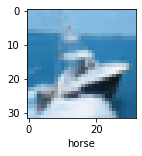

In [21]:
plot_sample(X_train, y_train, 8)


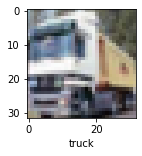

In [22]:
plot_sample(X_train, y_train, 1)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [23]:
x_train = x_train / 255.0
X_test = X_test / 255.0


Now let us build a convolutional neural network to train our images

In [24]:
input_img = keras.Input(shape=(32, 32,3))
m =layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='tanh')(input_img)
m =layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same')(m)
m =layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='tanh')(m)
encoded =layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same')(m)


x1 = layers.Conv2D(32, (3, 3), activation='tanh', padding='same')(encoded)
x2 = layers.UpSampling2D((2, 2))(x1)
x3 = layers.Conv2D(32, (3, 3), activation='tanh', padding='same')(x2)
x4 = layers.UpSampling2D((2, 2))(x3)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x4)
opt = SGD(lr=0.05)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
decoded.shape

TensorShape([None, 32, 32, 3])

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history =autoencoder.fit(x_train, x_train,
                epochs=100,callbacks=[callback],
                 verbose=1,
                batch_size=50, validation_data=(X_test, X_test))

Epoch 1/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5975 - accuracy: 0.5782 - val_loss: 0.5799 - val_accuracy: 0.6698
Epoch 2/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5746 - accuracy: 0.7026 - val_loss: 0.5746 - val_accuracy: 0.7254
Epoch 3/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5712 - accuracy: 0.7326 - val_loss: 0.5724 - val_accuracy: 0.7393
Epoch 4/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5692 - accuracy: 0.7423 - val_loss: 0.5707 - val_accuracy: 0.7483
Epoch 5/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5678 - accuracy: 0.7488 - val_loss: 0.5695 - val_accuracy: 0.7543
Epoch 6/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5667 - accuracy: 0.7546 - val_loss: 0.5685 - val_accuracy: 0.7600
Epoch 7/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5659 - accuracy: 0.7592 - val_loss: 0.5677 - val_accuracy: 0.7652

Epoch 58/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5565 - accuracy: 0.8017 - val_loss: 0.5590 - val_accuracy: 0.8027
Epoch 59/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5565 - accuracy: 0.8020 - val_loss: 0.5590 - val_accuracy: 0.8022
Epoch 60/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5564 - accuracy: 0.8024 - val_loss: 0.5590 - val_accuracy: 0.8030
Epoch 61/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5564 - accuracy: 0.8026 - val_loss: 0.5589 - val_accuracy: 0.8032
Epoch 62/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5564 - accuracy: 0.8029 - val_loss: 0.5589 - val_accuracy: 0.8031
Epoch 63/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5563 - accuracy: 0.8032 - val_loss: 0.5588 - val_accuracy: 0.8040
Epoch 64/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5562 - accuracy: 0.8035 - val_loss: 0.5588 - val_accuracy:

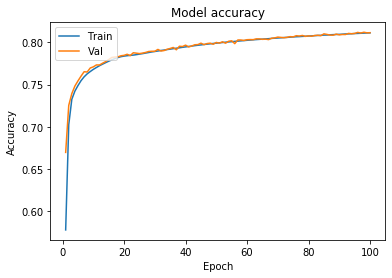

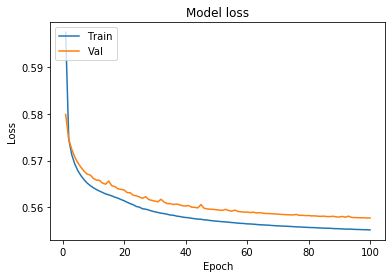

In [27]:
# Plot training & validation accuracy values
epoch_range = range(1, len(history.history['accuracy'])+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Reconstruction of images

In [28]:
decoded_imgs = autoencoder.predict(X_test)

In [29]:
decoded_imgs.shape

(10000, 32, 32, 3)

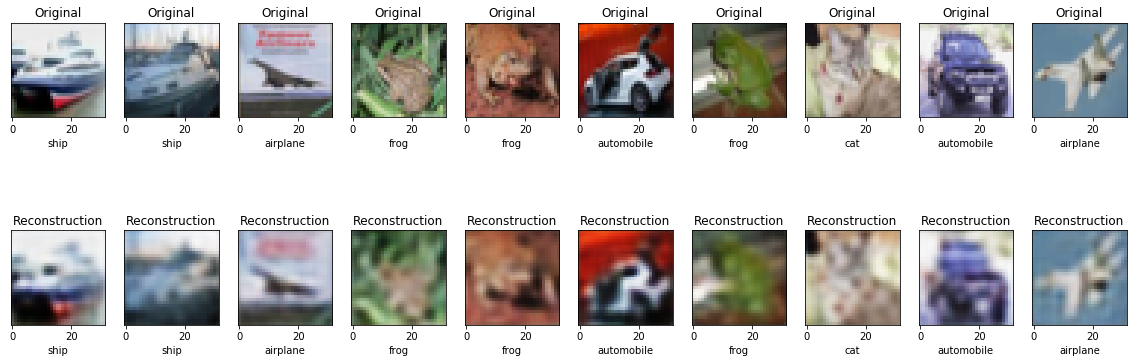

In [30]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 7))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i])
    plt.xlabel(classes[y_test[i]])
#     ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original',fontsize = 12)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.xlabel(classes[y_test[i]])
#     ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstruction',fontsize = 12)
plt.show()


## Now let us build a convolutional neural network to train our images

In [32]:
cnn1 = layers.Conv2D(filters= 16, kernel_size=(3, 3), activation='tanh', padding='same')(encoded)
cnn2 = layers.MaxPooling2D((2, 2))(cnn1)

# cnn3 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(cnn2)
# cnn4 =layers.MaxPooling2D((2,2))(cnn3)

cnn5 = layers.Flatten()(cnn2)
cnn6 = layers.Dense(128, activation='tanh')(cnn5)
cnn6 = layers.Dropout(0.5)(cnn5)
cnn_out = layers.Dense(10, activation='softmax')(cnn6)
CAE_CNN = keras.Model(input_img, cnn_out)
CAE_CNN.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history =CAE_CNN.fit(x_train, y_train,
                epochs=100,callbacks=[callback],
                 verbose=1,
                batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
4250/4250 [==============================] - 12s 3ms/step - loss: 1.5268 - sparse_categorical_accuracy: 0.4536 - val_loss: 1.3136 - val_sparse_categorical_accuracy: 0.5248
Epoch 2/100
4250/4250 [==============================] - 12s 3ms/step - loss: 1.2993 - sparse_categorical_accuracy: 0.5414 - val_loss: 1.1893 - val_sparse_categorical_accuracy: 0.5814
Epoch 3/100
4250/4250 [==============================] - 12s 3ms/step - loss: 1.2174 - sparse_categorical_accuracy: 0.5682 - val_loss: 1.1745 - val_sparse_categorical_accuracy: 0.5916
Epoch 4/100
4250/4250 [==============================] - 12s 3ms/step - loss: 1.1737 - sparse_categorical_accuracy: 0.5854 - val_loss: 1.1567 - val_sparse_categorical_accuracy: 0.5915
Epoch 5/100
4250/4250 [==============================] - 12s 3ms/step - loss: 1.1428 - sparse_categorical_accuracy: 0.5956 - val_loss: 1.0945 - val_sparse_categorical_accuracy: 0.6160
Epoch 6/100
4250/4250 [==============================] - 12s 3ms/step - loss: 1.

4250/4250 [==============================] - 11s 3ms/step - loss: 0.9364 - sparse_categorical_accuracy: 0.6718 - val_loss: 0.9410 - val_sparse_categorical_accuracy: 0.6733
Epoch 46/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.9365 - sparse_categorical_accuracy: 0.6718 - val_loss: 0.9466 - val_sparse_categorical_accuracy: 0.6659
Epoch 47/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.9297 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.9766 - val_sparse_categorical_accuracy: 0.6608
Epoch 48/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.9290 - sparse_categorical_accuracy: 0.6733 - val_loss: 0.9475 - val_sparse_categorical_accuracy: 0.6667
Epoch 49/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.9268 - sparse_categorical_accuracy: 0.6747 - val_loss: 0.9276 - val_sparse_categorical_accuracy: 0.6782
Epoch 50/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.9311 - 

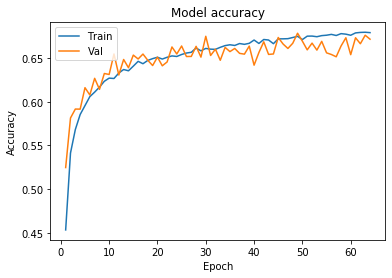

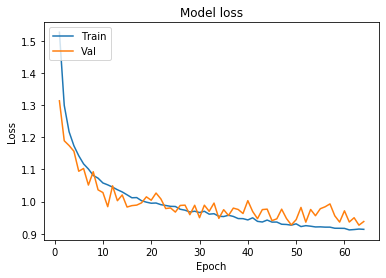

In [33]:
# Plot training & validation accuracy values
epoch_range = range(1, len(history.history['sparse_categorical_accuracy'])+1)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [34]:
CAE_CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9380 - sparse_categorical_accuracy: 0.6714


[0.9380384087562561, 0.6714000105857849]

In [35]:
y_pred = CAE_CNN.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]
y_pred[:5]

[3, 1, 8, 0, 6]

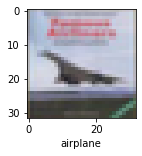

In [36]:
plot_sample(X_test, y_test,3)

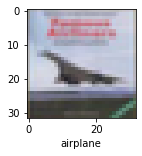

In [37]:
plot_sample(X_test, y_pred,3)

In [38]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x264f4476388>)

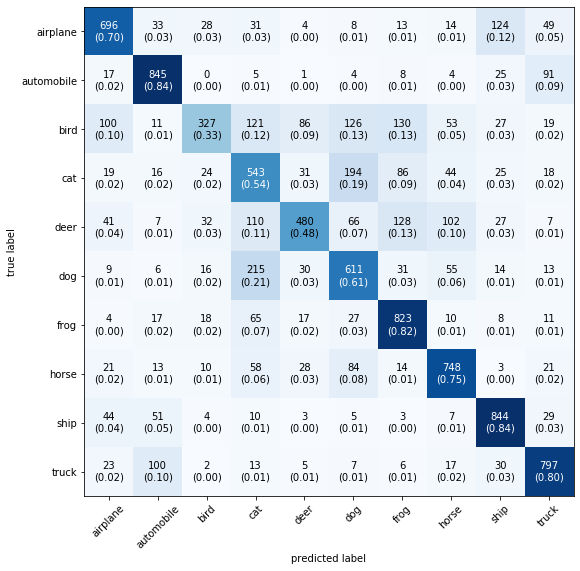

In [39]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes, show_normed=True)

In [40]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.77      0.84      0.81      1000
           2       0.71      0.33      0.45      1000
           3       0.46      0.54      0.50      1000
           4       0.70      0.48      0.57      1000
           5       0.54      0.61      0.57      1000
           6       0.66      0.82      0.73      1000
           7       0.71      0.75      0.73      1000
           8       0.75      0.84      0.79      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000

